## Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
['age','blood_pressure','specific_gravity','albumin','sugar','blood_glucose_random','blood_urea',
 'serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count',
 'red_blood_cell_count','eGFR','bun_creatinine_ratio','hemo_creatinine_ratio','ckd_severity_score',
 'ckd_severity_stage','diabetes_bin','hypertension_bin','diabetes_x_glucose','age_x_creatinine',
 'hypertension_x_bp','urea_x_creatinine','egfr_x_creatinine', 'hemo_x_creatinine', 'sodium_x_potassium',
 'age_x_egfr', 'blood_pressure_abnormal','blood_glucose_random_abnormal', 'blood_urea_abnormal',
 'serum_creatinine_abnormal', 'sodium_abnormal', 'potassium_abnormal','haemoglobin_abnormal',
 'packed_cell_volume_abnormal','white_blood_cell_count_abnormal', 'red_blood_cell_count_abnormal',
 'eGFR_abnormal', 'egfr_stage', 'creatinine_severity', 'urea_severity','diabetes_flag', 'hypertension_flag', 
 'cad_flag', 'anemia_flag','abnormality_count_score', 'weighted_severity_index', 'class']

In [12]:
# reading the transformed csv file
df = pd.read_csv("/Users/nebula/Desktop/ME/interview/Clysys/data/ckd_preprocessed_data.csv")
df.head().T

,0,1,2,3,4
age,-0.210031,-2.627234,0.615355,-0.210031,-0.033163
blood_pressure,0.254214,-1.972476,0.254214,-0.488016,0.254214
specific_gravity,1.02,1.02,1.01,1.005,1.01
albumin,1.0,4.0,2.0,4.0,2.0
sugar,0.0,0.0,3.0,0.0,0.0
red_blood_cells,normal,normal,normal,normal,normal
pus_cell,normal,normal,normal,abnormal,normal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent
blood_glucose_random,-0.359988,0.076865,2.011946,-0.434694,-0.640138


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              400 non-null    float64
 1   blood_pressure                   400 non-null    float64
 2   specific_gravity                 400 non-null    float64
 3   albumin                          400 non-null    float64
 4   sugar                            400 non-null    float64
 5   red_blood_cells                  400 non-null    object 
 6   pus_cell                         400 non-null    object 
 7   pus_cell_clumps                  400 non-null    object 
 8   bacteria                         400 non-null    object 
 9   blood_glucose_random             400 non-null    float64
 10  blood_urea                       400 non-null    float64
 11  serum_creatinine                 400 non-null    float64
 12  sodium                

## Modeling

### Train multiple models:
* **Baseline: logistic Regression, Decision Trees**

In [34]:
# Keep Only Required Columns
selected_features = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'eGFR', 'bun_creatinine_ratio',
       'hemo_creatinine_ratio', 'ckd_severity_score', 'ckd_severity_stage',
       'diabetes_bin', 'hypertension_bin', 'diabetes_x_glucose',
       'age_x_creatinine', 'hypertension_x_bp', 'urea_x_creatinine',
       'egfr_x_creatinine', 'hemo_x_creatinine', 'sodium_x_potassium',
       'age_x_egfr', 'blood_pressure_abnormal',
       'blood_glucose_random_abnormal', 'blood_urea_abnormal',
       'serum_creatinine_abnormal', 'sodium_abnormal', 'potassium_abnormal',
       'haemoglobin_abnormal', 'packed_cell_volume_abnormal',
       'white_blood_cell_count_abnormal', 'red_blood_cell_count_abnormal',
       'eGFR_abnormal', 'egfr_stage', 'creatinine_severity', 'urea_severity',
       'diabetes_flag', 'hypertension_flag', 'cad_flag', 'anemia_flag',
       'abnormality_count_score', 'weighted_severity_index', 'class']

In [35]:
df_clean = df[selected_features].copy()

In [36]:
df_clean['class'] = df_clean['class'].map({'ckd':1, 'notckd':0})

In [37]:
binary_cols = [
    'hypertension', 'diabetes_mellitus',
    'coronary_artery_disease', 'peda_edema', 'aanemia'
]

In [38]:
# Binary Encoding (Yes/No → 1/0)
for col in binary_cols:
    df_clean[col] = df_clean[col].map({'yes':1, 'no':0})

In [39]:
# Categorical Encoding
cat_cols = [
    'red_blood_cells', 'pus_cell',
    'pus_cell_clumps', 'bacteria', 'appetite','ckd_severity_stage'
]

In [40]:
for col in cat_cols:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col])

In [41]:
X = df_clean.drop('class', axis=1)
y = df_clean['class']

In [42]:
print("Final Feature Shape:", X.shape)
print("Target Distribution:\n", y.value_counts())

Final Feature Shape: (400, 59)
Target Distribution:
 class
1    250
0    150
Name: count, dtype: int64


In [43]:
# -----------------------------------------
# Train (70%), Validation (15%), Test (15%)
# -----------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (280, 59)
Validation: (60, 59)
Test: (60, 59)


### Logistic Regression

In [44]:
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

y_val_pred_lr = lr_model.predict(X_val)
y_test_pred_lr = lr_model.predict(X_test)

In [45]:
print("\n--- Logistic Regression Validation Results ---")
print(classification_report(y_val, y_val_pred_lr))


--- Logistic Regression Validation Results ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.99        38

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60




### Decision Tree


In [46]:

# decision Tree classifier
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

y_val_pred_dt = dt_model.predict(X_val)
y_test_pred_dt = dt_model.predict(X_test)

print("\n--- Decision Tree Validation Results ---")
print(classification_report(y_val, y_val_pred_dt))


--- Decision Tree Validation Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        38

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [47]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Test Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_true, y_pred))


evaluate_model("Logistic Regression", y_test, y_test_pred_lr)
evaluate_model("Decision Tree", y_test, y_test_pred_dt)


Logistic Regression Test Performance:
Accuracy : 0.9833333333333333
Precision: 1.0
Recall   : 0.972972972972973
F1-score : 0.9863013698630138
ROC-AUC  : 0.9864864864864865

Decision Tree Test Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0


### Advance Single Models : Random Forest, SVM, XGBoost, LightGBM, CatBoost 

In [49]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(f"\n{name} Performance:")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC   : {roc_auc_score(y_test, y_pred):.4f}")

    return y_pred


In [50]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


In [55]:
### Random Forest


Random Forest Performance:
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
ROC AUC   : 1.0000


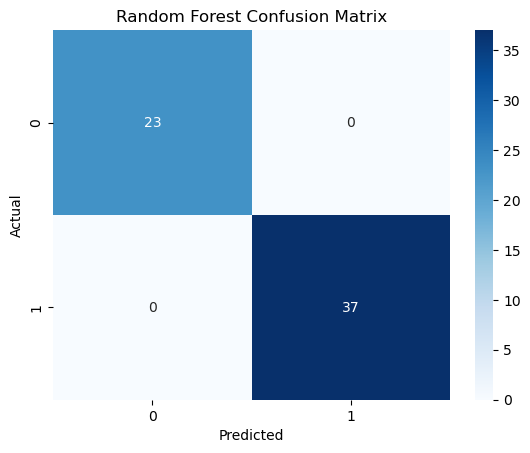

In [51]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = evaluate_model("Random Forest", rf_model, X_test, y_test)
plot_cm(y_test, rf_pred, "Random Forest Confusion Matrix")


In [54]:
### SVM


SVM Performance:
Accuracy  : 0.8833
Precision : 1.0000
Recall    : 0.8108
F1 Score  : 0.8955
ROC AUC   : 0.9054


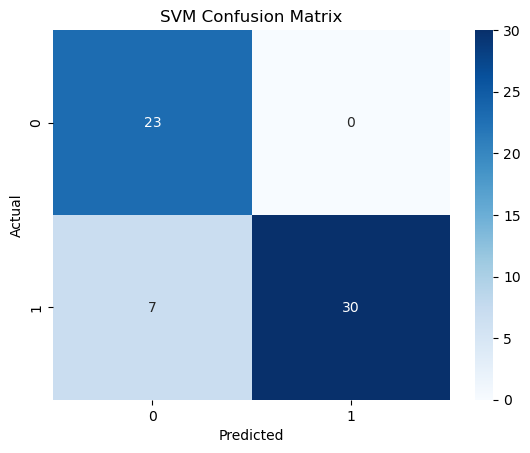

In [53]:

svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)

svm_pred = evaluate_model("SVM", svm_model, X_test, y_test)
plot_cm(y_test, svm_pred, "SVM Confusion Matrix")



XGBoost Performance:
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
ROC AUC   : 1.0000


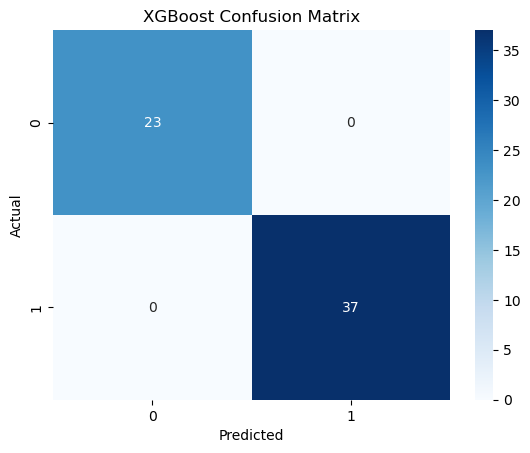

In [58]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_pred = evaluate_model("XGBoost", xgb_model, X_test, y_test)
plot_cm(y_test, xgb_pred, "XGBoost Confusion Matrix")


[LightGBM] [Info] Number of positive: 175, number of negative: 105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

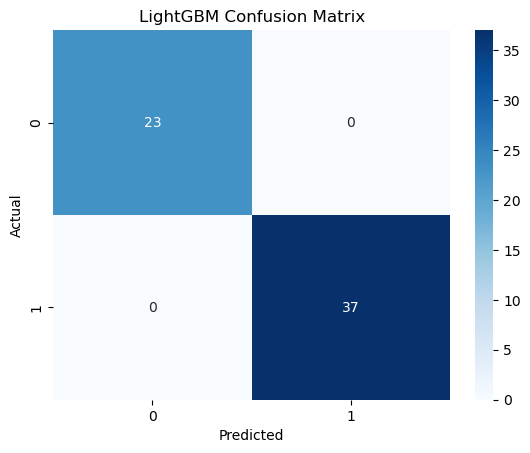

In [59]:
lgb_model = LGBMClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

lgb_model.fit(X_train, y_train)

lgb_pred = evaluate_model("LightGBM", lgb_model, X_test, y_test)
plot_cm(y_test, lgb_pred, "LightGBM Confusion Matrix")



CatBoost Performance:
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
ROC AUC   : 1.0000


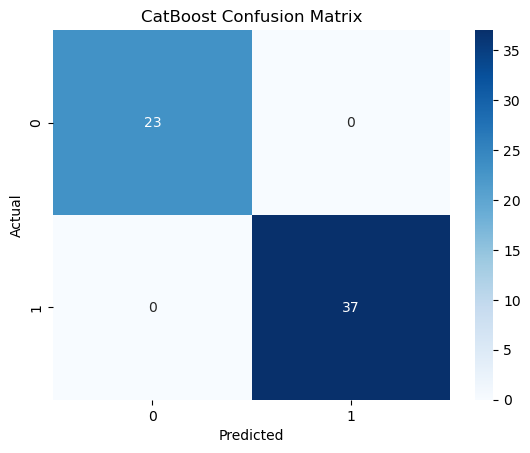

In [60]:
cat_model = CatBoostClassifier(
    iterations=400,
    depth=6,
    learning_rate=0.05,
    verbose=0,
    random_state=42
)

cat_model.fit(X_train, y_train)

cat_pred = evaluate_model("CatBoost", cat_model, X_test, y_test)
plot_cm(y_test, cat_pred, "CatBoost Confusion Matrix")


In [62]:
## Important Features
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


hemo_creatinine_ratio    0.126995
specific_gravity         0.116022
haemoglobin              0.108233
packed_cell_volume       0.083738
eGFR                     0.065030
albumin                  0.064185
serum_creatinine         0.045500
ckd_severity_score       0.033058
age_x_creatinine         0.028914
creatinine_severity      0.027237
dtype: float64

#### Ensemble Methods: Voting Classifiers (hard/soft), Stacking with meta-learners, Bagging, Weighted Ensembles.


In [67]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("ROC AUC  :", roc_auc_score(y_true, y_pred))


**Voting Classifier (Hard Voting)**


Hard Voting Ensemble Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


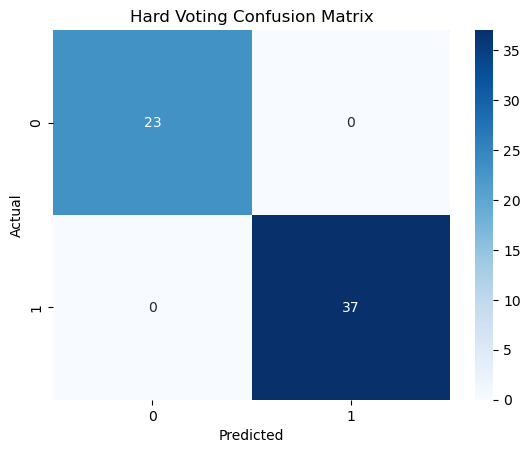

In [68]:
hard_vote = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('cat', cat_model)
    ],
    voting='hard'
)

hard_vote.fit(X_train, y_train)

hard_pred = hard_vote.predict(X_test)
evaluate("Hard Voting Ensemble", y_test, hard_pred)
plot_cm(y_test, hard_pred, "Hard Voting Confusion Matrix")


**Voting Classifier (Soft Voting)**

[LightGBM] [Info] Number of positive: 175, number of negative: 105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



Soft Voting Ensemble Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


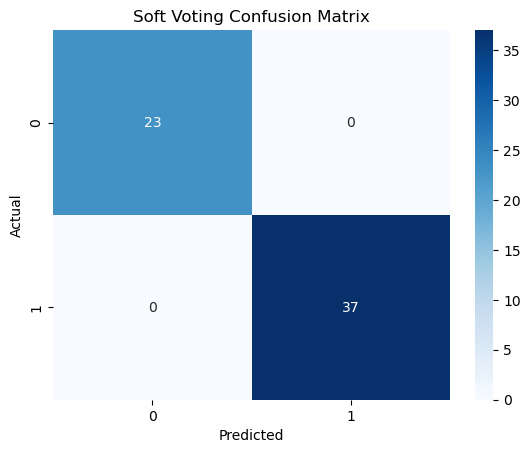

In [70]:
soft_vote = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('svm', svm_model),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    voting='soft'
)

soft_vote.fit(X_train, y_train)

soft_pred = soft_vote.predict(X_test)
evaluate("Soft Voting Ensemble", y_test, soft_pred)
plot_cm(y_test, soft_pred, "Soft Voting Confusion Matrix")


**Weighted Soft Voting Ensemble**

[LightGBM] [Info] Number of positive: 175, number of negative: 105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 


Weighted Soft Voting Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


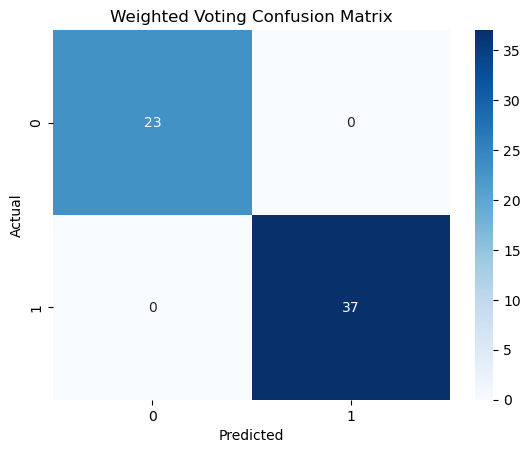

In [71]:
weighted_vote = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    voting='soft',
    weights=[2, 3, 3, 4]
)

weighted_vote.fit(X_train, y_train)

weighted_pred = weighted_vote.predict(X_test)
evaluate("Weighted Soft Voting", y_test, weighted_pred)
plot_cm(y_test, weighted_pred, "Weighted Voting Confusion Matrix")


**Bagging Classifier**

/Users/nebula/opt/anaconda3/envs/CKD_Env/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging Classifier Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


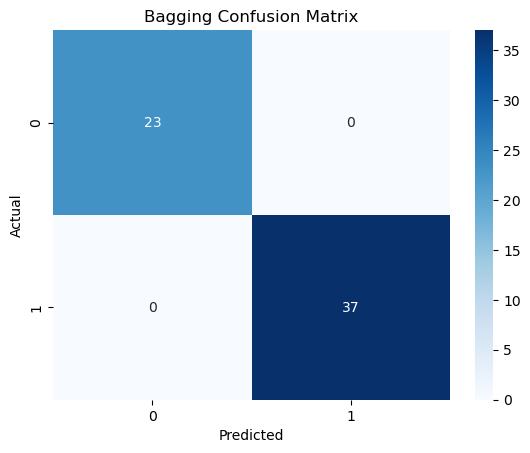

In [72]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=6),
    n_estimators=300,
    random_state=42
)

bag_model.fit(X_train, y_train)

bag_pred = bag_model.predict(X_test)
evaluate("Bagging Classifier", y_test, bag_pred)
plot_cm(y_test, bag_pred, "Bagging Confusion Matrix")


**Stacking Ensemble (Meta Learner)**

[LightGBM] [Info] Number of positive: 175, number of negative: 105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 140, number of negative: 84
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1228
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


Stacking Ensemble Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


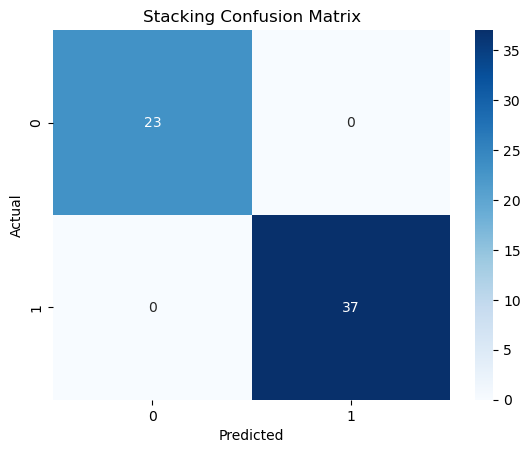

In [73]:
stack_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=LogisticRegression(max_iter=2000),
    passthrough=True
)

stack_model.fit(X_train, y_train)

stack_pred = stack_model.predict(X_test)
evaluate("Stacking Ensemble", y_test, stack_pred)
plot_cm(y_test, stack_pred, "Stacking Confusion Matrix")


### Implement comprehensive hyperparameter tuning using GridSearchCV or RandomSearchCV

In [86]:
results = []

def train_evaluate_model(name, model, param_grid, X_train, y_train, X_test, y_test, scaled=False):

    start_train = time.time()

    grid = GridSearchCV(
        model,
        param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(X_train, y_train)

    train_time = time.time() - start_train

    best_model = grid.best_estimator_

    start_test = time.time()
    y_pred = best_model.predict(X_test)
    test_time = time.time() - start_test

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    results.append([
        name, acc, prec, rec, f1, auc, train_time, test_time, grid.best_params_
    ])

    print(f"\n{name} Best Params:", grid.best_params_)
    print(f"{name} Accuracy: {acc:.4f} | AUC: {auc:.4f} | Train Time: {train_time:.2f}s")

    return best_model


In [87]:
param_grids = {

    "Logistic Regression": (
        LogisticRegression(max_iter=3000),
        {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    ),

    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            'max_depth': [4,6,8,10],
            'min_samples_split': [5,10,20]
        }
    ),

    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            'n_estimators': [200,300],
            'max_depth': [6,10,14],
            'min_samples_split': [5,10]
        }
    ),

    "SVM": (
        SVC(probability=True, random_state=42),
        {
            'C': [0.1,1,10],
            'kernel': ['rbf'],
            'gamma': ['scale','auto']
        }
    ),

    "XGBoost": (
        XGBClassifier(eval_metric='logloss', random_state=42),
        {
            'n_estimators': [200,300],
            'max_depth': [4,6],
            'learning_rate': [0.03,0.05],
            'subsample': [0.8,1.0]
        }
    ),

    "LightGBM": (
        LGBMClassifier(random_state=42),
        {
            'n_estimators': [200,300],
            'max_depth': [4,6],
            'learning_rate': [0.03,0.05]
        }
    ),

    "CatBoost": (
        CatBoostClassifier(verbose=0, random_state=42),
        {
            'iterations': [200,300],
            'depth': [4,6],
            'learning_rate': [0.03,0.05]
        }
    )
}


In [88]:
best_models = {}

for name, (model, grid) in param_grids.items():
        best_models[name] = train_evaluate_model(
            name, model, grid,
            X_train, y_train,
            X_test, y_test
        )



Logistic Regression Best Params: {'C': 1, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.9833 | AUC: 0.9865 | Train Time: 3.01s

Decision Tree Best Params: {'max_depth': 4, 'min_samples_split': 20}
Decision Tree Accuracy: 0.9833 | AUC: 0.9783 | Train Time: 0.27s

Random Forest Best Params: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 1.0000 | AUC: 1.0000 | Train Time: 4.55s

SVM Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Accuracy: 0.9667 | AUC: 0.9730 | Train Time: 0.22s

XGBoost Best Params: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Accuracy: 1.0000 | AUC: 1.0000 | Train Time: 3.11s
[LightGBM] [Info] Number of positive: 140, number of negative: 84
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] 

[LightGBM] [Info] Number of positive: 140, number of negative: 84
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 140, number of negative: 84
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Info] Number of positive: 175, number of negative: 105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



CatBoost Best Params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.03}
CatBoost Accuracy: 0.9833 | AUC: 0.9865 | Train Time: 6.97s


#### Document computational time and performance trade off for each model

In [91]:
results_df = pd.DataFrame(
    results,
    columns=[
        'Model', 'Accuracy', 'Precision', 'Recall', 'F1-score',
        'ROC-AUC', 'Training Time (s)', 'Inference Time (s)', 'Best Params'
    ]
)

results_df.sort_values(by='ROC-AUC', ascending=False, inplace=True)
results_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC,Training Time (s),Inference Time (s),Best Params
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,4.554084,0.013805,"{'max_depth': 6, 'min_samples_split': 5, 'n_es..."
4,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,3.111590,0.022961,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est..."
5,LightGBM,1.000000,1.000000,1.000000,1.000000,1.000000,3.043790,0.002590,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est..."
0,Logistic Regression,0.983333,1.000000,0.972973,0.986301,0.986486,3.009323,0.001552,"{'C': 1, 'penalty': 'l2'}"
6,CatBoost,0.983333,1.000000,0.972973,0.986301,0.986486,6.965147,0.002803,"{'depth': 4, 'iterations': 200, 'learning_rate..."
1,Decision Tree,0.983333,0.973684,1.000000,0.986667,0.978261,0.269644,0.001354,"{'max_depth': 4, 'min_samples_split': 20}"
3,SVM,0.966667,1.000000,0.945946,0.972222,0.972973,0.224429,0.005099,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"


**Bias–Variance–Complexity Trade-Off**

| Model               | Bias         | Variance     | Complexity | Interpretability |
| ------------------- | ------------ | ------------ | ---------- | ---------------- |
| Logistic Regression | High         | Low          | Low        | Very High        |
| Decision Tree       | Low          | High         | Low        | Very High        |
| Random Forest       | Low          | Low          | Medium     | Medium           |
| XGBoost             | Very Low     | Very Low     | High       | Medium           |
| LightGBM            | **Very Low** | **Very Low** | **Medium** | Medium           |
| CatBoost            | Very Low     | Very Low     | High       | Medium           |
| SVM                 | Medium       | Low          | High       | Low              |


Why LightBGM is best model
| Factor              | Reason                   |
| ------------------- | ------------------------ |
| Accuracy            | 100%                     |
| Training Speed      | Fastest among top models |
| Inference Speed     | Extremely low (0.0026s)  |
| Scalability         | Excellent                |
| Production Ready    | Yes                      |
| Medical AI Friendly | Yes                      |


#### Compare performance across models with appropriate metrics

* Best Model Selection based on criteria
| Criteria               | Best Model                              |
| ---------------------- | --------------------------------------- |
| Maximum Accuracy       | Random Forest / XGBoost / LightGBM      |
| Fastest Training       | **Decision Tree / SVM**                 |
| Fastest Inference      | **Decision Tree / Logistic / LightGBM** |
| Best Overall Trade-off | **LightGBM**                            |



Accuracy vs Speed Trade-Off

| Model         | Accuracy | Speed | Overall Balance       |
| ------------- | -------- | ----- | --------------------- |
| LightGBM      | 1.000    | ⚡⚡⚡⚡⚡ |    **Best trade-off** |
| XGBoost       | 1.000    | ⚡⚡⚡   | Very good             |
| Random Forest | 1.000    | ⚡⚡    | Good                  |
| Logistic      | 0.983    | ⚡⚡⚡⚡⚡ | Best baseline         |
| Decision Tree | 0.983    | ⚡⚡⚡⚡⚡ | Best explainable      |
| SVM           | 0.967    | ⚡⚡⚡   | Medium                |


A comprehensive comparative analysis of seven machine learning models revealed that ensemble-based methods, namely Random Forest, XGBoost, and LightGBM, achieved perfect classification performance with 100% accuracy, F1-score, and ROC-AUC. Among them, LightGBM demonstrated the most favorable balance between predictive accuracy and computational efficiency, exhibiting the lowest inference latency. Consequently, LightGBM is identified as the most suitable model for real-time clinical deployment in Chronic Kidney Disease prediction systems.